# Arquitectura de matplotlib

Matplotlib esta constituido por tres capas que se disponen en forma de pila, de forma que la capa inferior se comunica con la capa superior y con ella misma:
1. **Capa Backend**
2. **Capa Artist**
3. **Capa Script**

## Capa Backend

Esta capa es la mas profunda y es la que esta mas cerca del sistema operativo. Contiene una serie de clases abstractas que definen unos metodos abstractos que deben de implementar las clases que quieren utilizar este backend. Existen diferentes backends cada uno para representar los graficos en un determinado medio. Asi existen backends para representar los graficos en sistemas de ventanas, en una pagina web, en un notebook de jupyter o para impresion en formato vectorias (pdf, ps) o en formato renderizado (png, jpg, etc).
Las tres principales clases abstractas (interfaces) son:
1. **FigureCanvas**: Que seria como el lienzo donde se dibuja
2. **Renderer**: Que sería el pincel
3. **Event**: Que maneja los eventos del usuario para crear graficos interactivos

Los metodos pertenecientes a estas clases abstractas tendrán una implementación diferente dependiendo de donde sea el sitio donde se va a mostrar el grafico: en la web, en el sistema de ventanas o en hardcopy, es decir en copia en papel en los formatos pdf, ps, svg, png, etc

## Capa Artist

Es la capa principal donde se construye el grafico. Siguiendo con el simil sería como el pintor que sabe como utilizar el renderer (pincel) para poner la tinta sobre el lienzo (FigureCanvas).
El elemento principal es **Figure** que es el dibujo completo del grafico y todo lo que hay en Figure es una instancia de la clase Artist. Existen dos tipos de objetos:
1. **Primitivos (simples)**: rectangulos, lineas, texto, etc
1. **Compuestos**: Estan compuestos de objetos primitivos. Son por ejemplo: axis, leyendas, axes. Un objeto compuesto puede estar formado por uno o mas objetos compuestos. Asi por ejemplo un objeto de tipo Figure puede contener varios objetos del tipo *axes*

El objeto principal de esta capa es el objeto **axes** que es el espacio comprendido entre los dos ejes y es donde se circunscriben el resto de los objetos

La capa Artist se comunica con el Backend a traves de metodo **draw**. La capa Artist no necesita saber en que clase de Backend se va a dibujar el gráfico

Esta es la es la estructura básica de matplotlib y es la que se utiliza a nivel de programación. La **capa script**, es opcional y lo que hace fundamentalmente es facilitar el trabajo y hacer mas agil la construcción de graficos, lo cual es especialmente util para el científico de datos.
Vamos a ver una implementacion básica utilizando la dos capas básicas: **backend** y **artist**. Se trata de crear un **histograma** para representar los valores de un vector numpy de numeros aleatorios con 10000 elementos

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
# importamos la clase FigureCanvas desde un determinado backend y vinculamos a el un objeto de la clase Figure
from matplotlib.backends.backend_pdf import FigureCanvasPdf as FigureCanvas
from matplotlib.figure import Figure
fig = Figure()
canvas = FigureCanvas(fig)

In [20]:
# Creamos el vector de numpy de 10000 elementos aleatorios
x = np.random.randn(10000)

In [21]:
# A partir del objeto Figure creamos un objeto axes
# (111) es una convencion de MATLAB y significa que se crea un cuadrante de una fila y una columna y se utiliza
# la celda 1 (en este caso la unica), para dibujar el grafico

ax = fig.add_subplot(111)

In [22]:
# Ahora utilizamos el metodo hist del objeto axes para construir el histograma, con 100 bins
ax.hist(x,100)

(array([  1.,   0.,   2.,   3.,   1.,   2.,   4.,   4.,   6.,   6.,   5.,
          6.,   5.,  15.,  17.,  17.,  15.,  20.,  35.,  37.,  36.,  50.,
         47.,  55.,  64.,  76.,  78.,  88.,  91., 101., 105., 138., 143.,
        158., 171., 172., 184., 232., 211., 199., 246., 287., 258., 257.,
        267., 298., 238., 309., 311., 301., 284., 289., 280., 248., 271.,
        260., 209., 244., 211., 217., 216., 191., 165., 151., 176., 155.,
        160., 118.,  87.,  91.,  80.,  66.,  77.,  57.,  54.,  41.,  28.,
         31.,  29.,  15.,  19.,  16.,  14.,  16.,  13.,   7.,   6.,   7.,
          5.,   4.,   3.,   5.,   0.,   4.,   2.,   2.,   1.,   2.,   0.,
          1.]),
 array([-3.53290592, -3.46023731, -3.3875687 , -3.3149001 , -3.24223149,
        -3.16956288, -3.09689427, -3.02422567, -2.95155706, -2.87888845,
        -2.80621985, -2.73355124, -2.66088263, -2.58821402, -2.51554542,
        -2.44287681, -2.3702082 , -2.2975396 , -2.22487099, -2.15220238,
        -2.07953377, -2.00

In [23]:
# Le ponemos un titulo y lo guardamos
ax.set_title('Distribución normal estandar con $\mu=0, \sigma=1$')
fig.savefig('matplotlib_histogram.pdf')

## Capa Script

La tercera capa tiene como función simplificar la creación de graficos. La **capa script** lo que hace es realizar varias tareas por nosotros (under the hood). Es utilizada fundamentalmente por los cientificos de datos. La capa script mas utilizada es **pyplot**

Para comprender mejor el funcionamiento vamos a crear el grafico anterior con la capa script (matplotlib.pyplot)

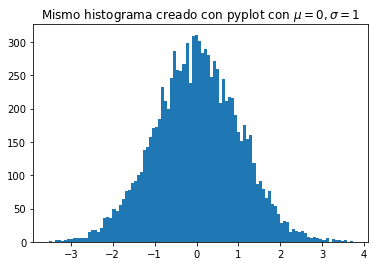

In [24]:
import matplotlib.pyplot as plt
plt.hist(x,100)
plt.title('Mismo histograma creado con pyplot con $\mu=0,\sigma=1$')
plt.savefig('nuevo_histograma.pdf')